In [1]:
import os
import pandas as pd

In [2]:
df = pd.read_csv(os.path.join("data","CZ_RADIO_TOP_100_tydenni.csv"))
wikid = pd.read_json(os.path.join("wikidata","wikidata.json"))
df = df.merge(wikid, on="interpret_hlavni", how="outer")

In [3]:
import re

In [4]:
def ohol(text):
    try:
        oholenost = text.replace(".","").replace(",","").replace("?","").replace("!","").replace("-","").replace("(","").replace(")","").lower()
    except:
        oholenost = text
    return oholenost

In [5]:
df['track_oholeny'] = df['track'].apply(lambda x: ohol(x))

In [6]:
df['slova'] = df['track_oholeny'].apply(lambda x: x.split(" ") if isinstance(x,str) else x)

## Žebříčky slov

In [7]:
df.explode('slova').groupby('slova')['track'].nunique().nlargest(50)

slova
you      259
the      226
me       213
feat     183
love     178
i        151
to       132
my       117
it       109
a        102
on        89
of        86
in        83
up        64
your      57
all       55
&         54
like      52
for       50
is        48
we        46
be        45
don't     40
no        40
this      40
what      40
one       39
do        36
life      36
and       34
night     34
go        33
v         32
with      32
down      31
out       31
heart     30
know      29
se        29
time      29
good      28
now       27
so        27
world     27
let       26
never     26
song      26
back      25
na        25
are       24
Name: track, dtype: int64

In [8]:
df[df['zeme_puvodu'] == 'Česko'].explode('slova').groupby('slova')['track'].nunique().nlargest(50)

slova
v          27
feat       26
to         25
a          23
se         23
na         18
the        15
you        15
je         14
já         14
co         13
do         11
love       10
láska      10
my         10
o          10
tě         10
i           9
mám         9
tak         9
z           9
jsem        8
mi          8
mě          8
on          8
si          8
noc         7
of          7
ráno        7
s           7
all         6
chci        6
jsi         6
me          6
nad         6
nebe        6
srdce       6
vánoční     6
čas         6
život       6
is          5
it          5
jako        5
jednou      5
nech        5
no          5
ty          5
vánoce      5
by          4
dál         4
Name: track, dtype: int64

## Vývoj slov (ošemetné: je silně ovlivněno dramaturgií domácí/zahraniční)

In [9]:
def pomer(s):
    podil = df[df['track'].str.lower().str.contains(s, na=False)].groupby('rok').size() / df.groupby('rok').size()
    podil.plot.bar()
    return podil

rok
2006.0    0.039608
2007.0    0.039020
2008.0    0.051346
2009.0    0.033529
2010.0    0.075385
2011.0    0.031400
2012.0    0.047451
2013.0    0.058235
2014.0    0.063800
2015.0    0.074808
2016.0    0.064706
2017.0    0.039615
2018.0    0.034800
2019.0    0.040196
2020.0    0.051569
2021.0    0.066078
2022.0    0.048824
2023.0    0.042857
dtype: float64

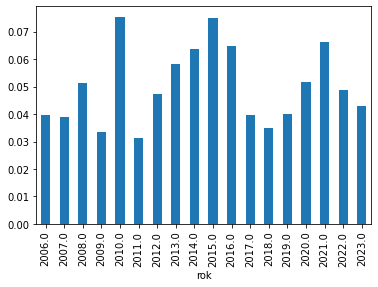

In [10]:
pomer('love')